# ML Trader

In [1]:
from utils.packages import *
from utils.variables import *
from utils.i_o import *
from utils.dir_slope import *
from utils.engine import *
from utils.loops import *
from utils.order import *
import winsound

In [2]:
%%time
data = get_date_list(data)
data = run_engine(data)

100%|█████████████████████████████| 1911315/1911315 [01:54<00:00, 16704.14it/s]

pls    0.03373
dtype: float64
--------------------------------------
                   date ord_types               close_type      pls
140 2021-01-28 02:38:42     short                all_close -0.00132
141 2021-01-28 02:38:42     short                all_close  0.00134
142 2021-01-28 13:43:57      long                all_close -0.00138
143 2021-01-28 13:43:57      long                all_close  0.00138
144 2021-01-28 16:03:58      long                all_close -0.00132
145 2021-01-28 16:03:58      long                all_close  0.00132
146 2021-01-28 23:55:09     short  simple_slema_move_close  0.00001
147 2021-01-29 01:40:35     short  simple_slema_move_close  0.00001
148 2021-01-29 04:59:25     short  simple_slema_move_close  0.00001
149 2021-01-29 08:42:51      long  simple_slema_move_close  0.00001
150 2021-01-29 10:55:17      long  simple_slema_move_close  0.00001
151 2021-01-29 12:05:31      long  simple_slema_move_close  0.00001
152 2021-01-29 15:57:13     short              

In [3]:
data['temp_df']['open_order'] = data['open_order_temp_list']
data['temp_df']['pl'] = data['pl_temp_list'] 
data['temp_df'].to_csv('data/temp.csv')

In [4]:
min(data['temp_df']['pl'])

-0.16551

In [5]:
max(data['temp_df']['pl'])

0.0043

In [6]:
max(data['temp_df']['open_order'])

18

In [7]:
data['dt_val']

datetime.datetime(2021, 1, 31, 23, 59, 53)

In [8]:
data['orders_list']

{'total_pl': 0,
 'pl_list': [],
 1: {'open_order_type': 'short', 'bid': 1.21288, 'pl': 0.00032}}

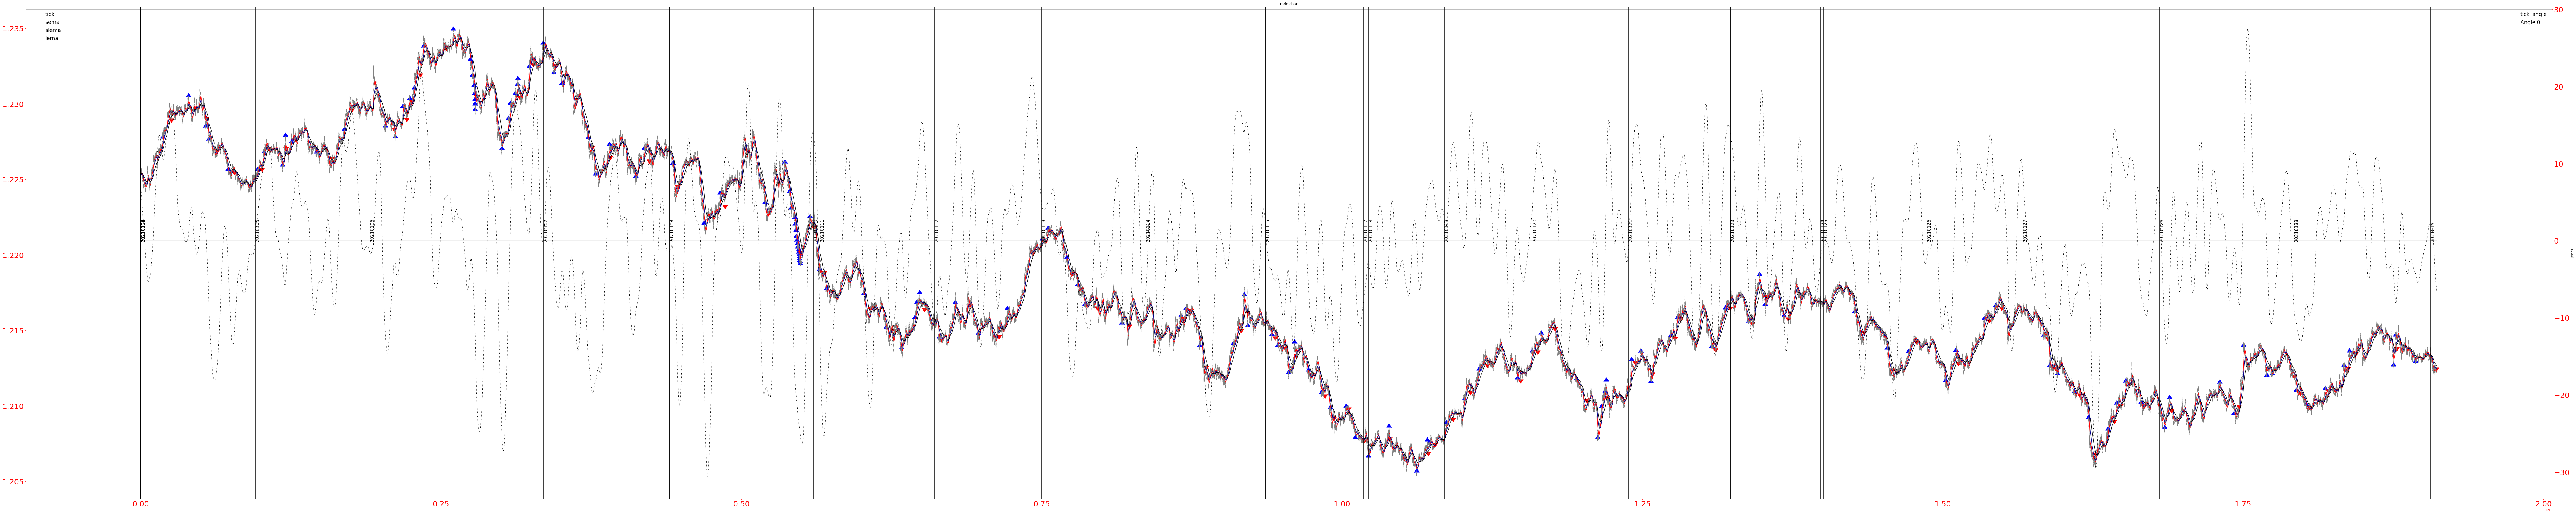

-----------------------------------------------------
Total PL : 0.03373000000000003
-------------
net_pl            : 0.03373/0.27083
-------------
+ve               : num= 113    sum= +0.15228    avg= +0.00135
-ve               : num= 40    sum= -0.11855    avg= -0.00296
-----------------------------------------------------
month_val
1    0.03373
Name: pls, dtype: float64
-----------------------------------------------------
simple_slema_move_close    79
all_close                  76
Name: close_type, dtype: int64
-----------------------------------------------------


In [9]:
if data["plot"]:
    data = adjust_plot_list_lengths(data)
    plot_graph(data)
    
print('-----------------------------------------------------')
print_report(data)
print('-----------------------------------------------------')
print(data['report_df'].groupby(['month_val'])['pls'].sum())
print('-----------------------------------------------------')
print(data['report_df']['close_type'].value_counts())
print('-----------------------------------------------------')
winsound.PlaySound('C:\\Windows\\Media\\tada.wav', winsound.SND_ASYNC)

In [10]:
data['report_df'].groupby(['date_val'])['pls'].sum()

date_val
4     0.00190
5     0.00274
6     0.00210
7     0.00137
8     0.00390
10    0.00038
11    0.00092
12    0.00388
13    0.00094
14    0.00362
15    0.00075
17    0.00002
18    0.00009
19    0.00148
20    0.00204
21    0.00028
22    0.00005
25    0.00327
26    0.00012
27    0.00342
28    0.00003
29    0.00011
31    0.00032
Name: pls, dtype: float64

In [11]:
winsound.PlaySound('C:\\Windows\\Media\\tada.wav', winsound.SND_ASYNC)
send_telegram_message(f'Run Complete : {data["df_name"]}')

In [12]:
data['report_df'].groupby(['close_type'])['pls'].mean()

close_type
all_close                  0.000060
simple_slema_move_close    0.000369
Name: pls, dtype: float64

In [13]:
data['report_df'].groupby(['close_type'])['pls'].sum()

close_type
all_close                  0.00455
simple_slema_move_close    0.02918
Name: pls, dtype: float64

In [14]:
data['report_df'].groupby(['close_type'])['pls'].count()

close_type
all_close                  76
simple_slema_move_close    79
Name: pls, dtype: int64

In [15]:
x = np.round(data['report_df'].groupby(['month_val', 'date_val'])['pls'].sum().values.mean(),4)
print(f'Average pips per day : {x}')

Average pips per day : 0.0015


In [16]:
x = data['report_df'].groupby(['month_val', 'date_val'])['pls'].count().values.mean()
print(f'Average orders per day : {x}')

Average orders per day : 6.739130434782608


In [17]:
data['report_df'].groupby(['date'])['date'].count().value_counts().sort_values(ascending=False)

1     79
2     18
4      2
6      1
8      1
18     1
Name: date, dtype: int64

In [18]:
data['report_df']['duration'].sort_values(ascending=False)

154   2 days 05:37:47
96    2 days 04:17:24
63    2 days 01:17:19
97    0 days 07:30:27
146   0 days 07:05:18
            ...      
8     0 days 00:03:21
153   0 days 00:02:54
145   0 days 00:02:19
2     0 days 00:01:26
87    0 days 00:01:24
Name: duration, Length: 155, dtype: timedelta64[ns]